In [1]:
%load_ext dotenv
%dotenv 
import os
import sys
sys.path.append(os.getenv('SRC_DIR'))
from logger import get_logger
_logs = get_logger(__name__)

In [2]:
import dask.dataframe as dd
import pandas as pd
import numpy as np
import os
from glob import glob

In [17]:
# Addition SLF 
ft_dir = os.getenv("FEATURES_DATA")
os.path.join(ft_dir, '*.parquet')

# \\ is a special character for a \ in python, like \n is carriage return

'../../05_src/data/features/stock_features.parquet\\*.parquet'

In [15]:
ft_dir = os.getenv("FEATURES_DATA")
ft_glob = glob(ft_dir+'/*.parquet')
df = dd.read_parquet(ft_glob).compute().reset_index()

In [ ]:
#  SLF
df

,Ticker,Date,Adj Close,Close,High,Low,Open,Volume,Year,Close_lag_1,Returns
0,AAPL,2000-01-03,0.843076,0.999442,1.004464,0.907924,0.936384,535796800.0,2000,NaN,NaN
1,AAPL,2000-01-04,0.771997,0.915179,0.987723,0.903460,0.966518,512377600.0,2000,0.999442,-0.084310
2,AAPL,2000-01-05,0.783294,0.928571,0.987165,0.919643,0.926339,778321600.0,2000,0.915179,0.014633
3,AAPL,2000-01-06,0.715508,0.848214,0.955357,0.848214,0.947545,767972800.0,2000,0.928571,-0.086538
4,AAPL,2000-01-07,0.749401,0.888393,0.901786,0.852679,0.861607,460734400.0,2000,0.848214,0.047369
...,...,...,...,...,...,...,...,...,...,...,...
403451,ZBRA,2025-01-17,405.709991,405.709991,407.290009,402.290009,406.040009,270600.0,2025,402.720001,0.007424
403452,ZBRA,2025-01-21,418.070007,418.070007,419.850006,407.619995,407.619995,446000.0,2025,405.709991,0.030465
403453,ZBRA,2025-01-22,420.570007,420.570007,427.760010,419.589996,425.239990,497500.0,2025,418.070007,0.005980
403454,ZBRA,2025-01-23,421.109985,421.109985,422.290009,414.450012,417.619995,377100.0,2025,420.570007,0.001284


In [23]:
# SLF 
# df['Ticker']
# type(df['Ticker']) # pandas.core.series.Series 
# df.info() # df.info() is a method of pandas.core.frame.DataFrame
df['Ticker'].unique() # 


<ArrowStringArray>
['AAPL',  'ACN', 'ADBE',  'ADI', 'ADSK', 'AKAM', 'AMAT',  'AMD', 'ANET',
 'ANSS',  'APH', 'AVGO', 'CDNS',  'CDW',  'CRM', 'CSCO', 'CTSH', 'ENPH',
 'EPAM', 'FFIV', 'FICO', 'FSLR', 'FTNT',  'GEN',  'GLW',  'HPE',  'HPQ',
  'IBM', 'INTC', 'INTU',   'IT',  'JBL', 'JNPR', 'KEYS', 'KLAC', 'LRCX',
 'MCHP', 'MPWR', 'MSFT',  'MSI',   'MU',  'NOW', 'NTAP', 'NVDA', 'NXPI',
   'ON', 'ORCL', 'PANW',  'PTC', 'QCOM', 'QRVO',  'ROP', 'SNPS',  'STX',
 'SWKS',  'TDY',  'TEL',  'TER', 'TRMB',  'TXN',  'TYL', 'VRSN',  'WDC',
 'ZBRA']
Length: 64, dtype: string

In [ ]:
# SLF 
# To increase the stocks, we can use the following code 
# Jesus has another folder having much more companies data - I don't have that folder 

# ft_dir = os.getenv("FEATURES_DATA")
# ft_dir = '../../05_src/data/features/stock_features'


# Sampling in Python

+ There are different packages that allow sampling.
+ A practical approach is to use pandas/Dask sampling methods.

## Random Sampling

+ Sample n rows from a dataframe with [`df.sample()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html).

```
DataFrame.sample(
    n=None, frac=None, replace=False, weights=None, 
    random_state=None, axis=None, ignore_index=False
    )
```

In [25]:
# df.sample(n = 5) 

# SLF 
df.sample(n = 5, random_state=42) # 5 random rows

,Ticker,Date,Adj Close,Close,High,Low,Open,Volume,Year,Close_lag_1,Returns
70987,AVGO,2006-07-18,NaN,NaN,NaN,NaN,NaN,NaN,2006,NaN,NaN
46412,AMD,2009-02-03,2.210000,2.210000,2.230000,2.110000,2.160000,8594900.0,2009,2.150000,0.027907
132400,FSLR,2000-01-26,NaN,NaN,NaN,NaN,NaN,NaN,2000,NaN,NaN
199351,JBL,2015-08-13,17.991861,19.500000,19.799999,19.450001,19.540001,1633800.0,2015,19.600000,-0.005102
157353,GLW,2024-01-31,31.562752,32.490002,33.389999,32.360001,33.320000,10103800.0,2024,33.299999,-0.024324


In [29]:
select_tickers = df['Ticker'].unique().tolist()[0:9]    
    # If you need full listing, run this line and comment out the  next line for selection of tickers 
# select_tickers = ['OXY', 'TXN', 'PCG', 'CBRE', 'ROK', 'AMT', 'D', 'YUM', 'PWR']
select_tickers

# SLF
type(select_tickers) # type is list 

list

In [30]:
idx = df['Ticker'].isin(select_tickers)
small_df = df[idx]
simple_sample_dt = small_df.sample(frac = 0.1)
simple_sample_dt.shape, small_df.shape

((5674, 11), (56736, 11))

In [31]:
# SLF
small_df
small_df['Ticker'].unique()
small_df['Ticker'].value_counts() 


Ticker
AAPL    6304
ACN     6304
ADBE    6304
ADI     6304
ADSK    6304
AKAM    6304
AMAT    6304
AMD     6304
ANET    6304
Name: count, dtype: int64[pyarrow]

Look at the distribution of tickers.

<Axes: xlabel='Ticker'>

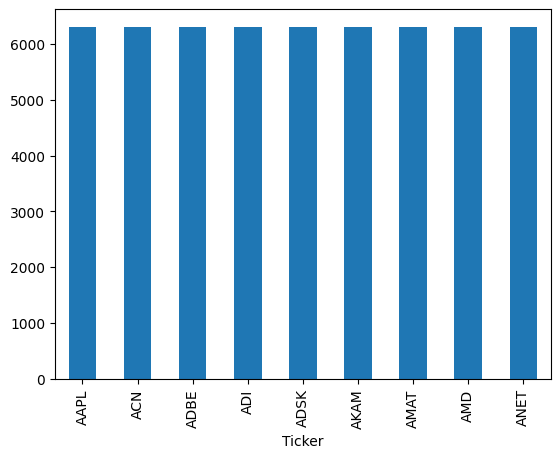

In [32]:
small_df['Ticker'].value_counts().plot(kind='bar')

<Axes: xlabel='Ticker'>

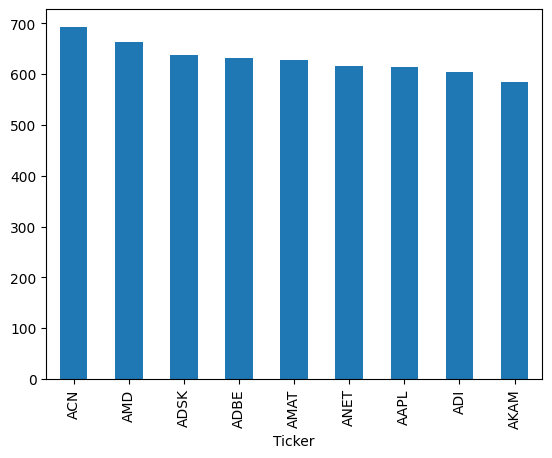

In [33]:
simple_sample_dt['Ticker'].value_counts().plot(kind='bar')

## Stratified Sampling

+ Use `groupby()` and `.sample()` for stratified sampling.

<Axes: xlabel='Ticker'>

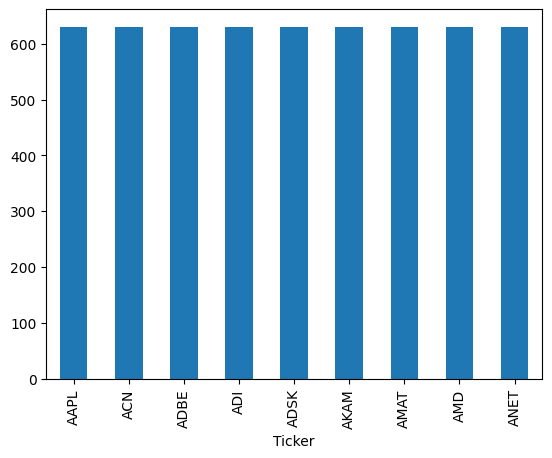

In [34]:
strat_sample_dt = small_df.groupby(['Ticker']).sample(frac = 0.1)
strat_sample_dt['Ticker'].value_counts().plot(kind='bar')

# Sampling in Dask

+ Stratified sampling in `dask` can be achieved with `groupby().apply()` and a lambda function.

C:\Users\engr_\AppData\Local\Temp\ipykernel_2248\2388710987.py:2: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  strat_sample_dd_dt = (dd_dt


<Axes: xlabel='Ticker'>

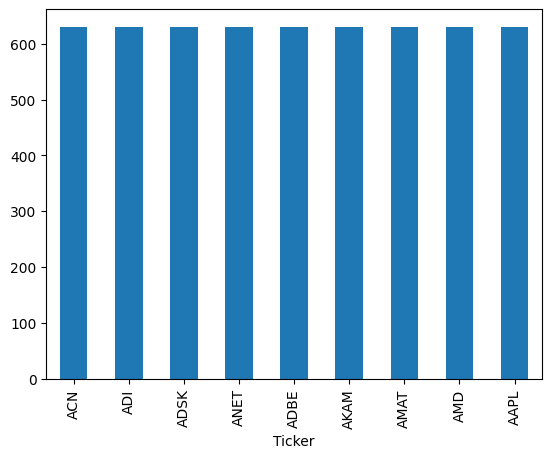

In [35]:
dd_dt = dd.read_parquet(ft_glob)
strat_sample_dd_dt = (dd_dt
                      .groupby('Ticker', group_keys=False)
                      .apply(lambda x: x.sample(frac = 0.1))
                      .compute()
                      .reset_index())
strat_sample_dd_dt[strat_sample_dd_dt['Ticker'].isin(select_tickers)]['Ticker'].value_counts().plot(kind='bar')